# **Исследование объявлений о продаже квартир**

**Заказчик** — сервис Яндекc Недвижимость.

**Источник данных** — данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Цель исследования**:
1. Научиться определять рыночную стоимость объектов недвижимости.

**Поставленные задачи**
1. Проверить данные на наличие пропусков, аномалий и дубликатов. Выяснить их природу и по возможности исправить.
2. Определить основные параметры для определение рыночной стоимости. Найти закономерности.
3. Из 10 населённых пунктов с наибольшим числом объявлений посчитать среднюю цену квадратного метра и выделить с самой высокой и низкой стоимостью жилья.
4. Выяснить, какая область в Санкт-Петербурге входит в центр.
5. Выделить факторы, которые влияют на стоимость квартиры в центре.

**Дальнейшее использование**

Результаты исследования будут учтены при построении автоматизированной системы, которая отследит аномалии и мошенническую деятельность, повысив качество объявлений и доверие пользователей к сервису.

## **I. Обзор данных**

В ходе исследования нам понадобятся библиотеки:

* `pandas`
* `seaborn`
* `math`
* `matplotlib`

Поэтому сразу импортируем их.

In [1]:
import pandas as pd

pd.options.display.float_format ='{:,.1f}'.format

import seaborn as sb

import matplotlib.pyplot as plt

Сначала составим представление о полученных исходных данных.
Для этого используем библиотеку `pandas`.

Прочитаем файл `real_estate_data.csv` из папки `/datasets/` и сохраним его в переменной `df`:

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')

Выведем на экран первые пять строк таблицы:

In [3]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,nan,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,nan
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,nan,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,nan,0.0,nan,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,nan,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,nan,14.0,nan,9,NaN,...,nan,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,nan,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


Получим общую информацию о таблице: <a id='df.info'></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Итак, в таблице двадцать два столбца. Типы данных в столбцах — целые числа `int`, вещественные числа `float`, булевые значения `bool` и строки `object`.

Согласно документации к данным:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Значит, в данных есть **пропущенные значения**.

В названиях колонок видны нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Несколько слов написано слитно, а по правилам хорошого тона необходимо прописать в "змеином регистре"

### **Выводы**

В каждой строке таблицы — данные об уникальном объявлении. 
* Часть колонок описывает общие параметры квартиры/ аппартаментов, записанные пользователем: число балконов, высота потолков, этаж, этажей в доме, площадь курхни и жилого пространства, название населенного пункта, число комнат, площадь квартиры, тип помещения (студия или аппартаменты), наличие планировки. 
* Вторая часть — получена на основе картографических данных и дает дополнительную информацию об объекте аренды: расстояние до центра, аэропорта, ближайшего парка и водоёма, число ближайших парков и водоемов. 
* Остальные данные получены с сайта, которые характеризуют само объявление: время "жизни" объявления, цена на момент снятия с публикации и количество прикрепленных фотографий.

Предварительно можно утверждать, что данных достаточно для исследования и решения поставленных задач. Однако первично уже установлено, что встречаются пропуски в данных.

Прежде, чем перейти к решению поставленных задач, необходимо устранить проблемы в данных.

## **II. Предобработка данных**

### 1. Стиль заголовков

Вывевем на экран названия столбцов:

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Приведем названия в соответствие с хорошим стилем:
* несколько слов в названии запишем в «змеином_регистре»,
* все символы сделаем строчными,
* устраним пробелы при наличии.

Для этого напишем **функцию `columns_to_norm` для переименования колонок**, которую можно будет использовать при больших объемах данных:

In [6]:
def columns_to_norm(columns):
  columns_new = []
  for column in columns:
    name = []
    for index in range(len(column)):
      if column[index] != ' ' and column[index] != '_':
        name.append(column[index])     
      elif index + 1 <= len(column)-1 and index - 1 >= 0 and len(name) != 0:  # условие отсекающее ошибку выхода за границы индексирования и добавления "_" первым знаком   
        if (column[index + 1] != ' ' and column[index + 1] != '_'):           # проверка следующего индекса на наличие значения         
          name.append('_')
    name = ''.join(name)
    name = name.lower()
    columns_new.append(name)
  df.columns = columns_new
  return df.columns

Примерим созданную функцию для корректировки названия столбцов, дополнительно вручную скорректируем несколько названий и проверим результат. 

In [7]:
columns_to_norm(df.columns)
df = df.rename(columns={
    'citycenters_nearest':'city_centers_nearest',
    'parks_around3000':'parks_around_3000',
    'ponds_around3000':'ponds_around_3000'
})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### 2. Пропуски в данных

Как видно из [общей информации](#df.info) о датафрейме `df`, количество значений в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest`, `days_exposition` отличается от общего количества строк `23699`, следовательно там есть **пропущенные значения**.

Чтобы в этом убедиться вызовем метод `isna()` для двух столбцов: 

In [8]:
for column in list(df.columns)[5:]:
    print(f'Количество пропусков в столбце {column}:', len(df[df[column].isna()]))
    k = len(df[df[column].isna()]) / df.shape[0]
    print(f'Таким образом доля незаполненных данных составляет: {k:.1%}\n')

Количество пропусков в столбце ceiling_height: 9195
Таким образом доля незаполненных данных составляет: 38.8%

Количество пропусков в столбце floors_total: 86
Таким образом доля незаполненных данных составляет: 0.4%

Количество пропусков в столбце living_area: 1903
Таким образом доля незаполненных данных составляет: 8.0%

Количество пропусков в столбце floor: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце is_apartment: 20924
Таким образом доля незаполненных данных составляет: 88.3%

Количество пропусков в столбце studio: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце open_plan: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце kitchen_area: 2278
Таким образом доля незаполненных данных составляет: 9.6%

Количество пропусков в столбце balcony: 11519
Таким образом доля незаполненных данных составляет: 48.6%

Количество пропусков в столбце locality_name: 49
Таким

Количество пропусков неоднородное во всех столбцах. Сперва необходимо решить, какие из пропусков могут быть заполнены, а какие лучше оставить нетронутыми во избежания внесения большого изменения в данные и в конечные выводы.

Как установлено ранее наши данных собраны на основании разных источников информации:
* из объявления пользователя,
* статистическая информация сайта,
* на основании картографических данных.



Для начала напишем функцию `na_to_median` для заполнения `NaN`, сгруппированных по одному столбцу

In [9]:
def na_to_median(column1, column2):
    # column1 - столбец группировки
    # column2 - целевой столбец в NA
    
    column1 = df[column1]
    
    for value in column1.unique():
        median = df.loc[column1 == value, column2].median()
        print(f'Для группы {value} медиана равна {median:.1f}')
        df.loc[(df[column2].isna()) & (column1 == value), column2].median()
    
    df[column2] = df[column2].fillna(value=df[column2].median()) # для негруппируемых значений будет выводиться общая медиана

**Для столбца `ceiling_height`:**

1. Сделаем первое предположение, что <span style="color: #4682B4; font-weight: 600"> `высота потолков` в квартире напрямую зависит от типа постройки (конструктивной модели здания), которую можно определить по количеству этажей</span> и необходимо заполнить пустые значения медианными по группе `высоты здания`.

In [10]:
na_to_median('floors_total', 'ceiling_height')

Для группы 16.0 медиана равна 2.7
Для группы 11.0 медиана равна 2.8
Для группы 5.0 медиана равна 2.5
Для группы 14.0 медиана равна 2.6
Для группы 12.0 медиана равна 2.6
Для группы 26.0 медиана равна 2.7
Для группы 24.0 медиана равна 2.8
Для группы 27.0 медиана равна 2.7
Для группы 9.0 медиана равна 2.5
Для группы 6.0 медиана равна 3.0
Для группы 17.0 медиана равна 2.7
Для группы 25.0 медиана равна 2.8
Для группы 3.0 медиана равна 2.8
Для группы 23.0 медиана равна 2.8
Для группы 19.0 медиана равна 2.8
Для группы 18.0 медиана равна 2.7
Для группы 4.0 медиана равна 3.0
Для группы 22.0 медиана равна 2.8
Для группы 8.0 медиана равна 2.8
Для группы 2.0 медиана равна 2.7
Для группы 10.0 медиана равна 2.6
Для группы 7.0 медиана равна 3.0
Для группы 13.0 медиана равна 2.7
Для группы 15.0 медиана равна 2.7
Для группы nan медиана равна nan
Для группы 20.0 медиана равна 2.8
Для группы 28.0 медиана равна 2.6
Для группы 36.0 медиана равна 14.8
Для группы 21.0 медиана равна 2.7
Для группы 35.0 медиан

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**Для `floors_total`:**

Выполним обратную операцию для заполнения `высоты здания` по `потолкам`. Это дейтсвие не является исключительно верным, однако процент пропущенных значений низкий, так что особого влияния на наше исследование не будет иметь.

In [11]:
na_to_median('ceiling_height', 'floors_total')

Для группы 2.7 медиана равна 12.0
Для группы 2.65 медиана равна 9.0
Для группы 3.03 медиана равна 6.0
Для группы 2.5 медиана равна 7.0
Для группы 2.67 медиана равна 12.0
Для группы 2.56 медиана равна 9.0
Для группы 3.05 медиана равна 6.0
Для группы 2.75 медиана равна 16.0
Для группы 2.6 медиана равна 9.0
Для группы 2.9 медиана равна 5.0
Для группы 2.8 медиана равна 16.0
Для группы 2.55 медиана равна 9.0
Для группы 3.0 медиана равна 5.0
Для группы 3.2 медиана равна 5.0
Для группы 2.61 медиана равна 14.0
Для группы 3.25 медиана равна 5.0
Для группы 3.45 медиана равна 5.0
Для группы 2.77 медиана равна 16.0
Для группы 2.85 медиана равна 13.0
Для группы 2.64 медиана равна 16.0
Для группы 2.57 медиана равна 9.0
Для группы 4.15 медиана равна 3.0
Для группы 3.5 медиана равна 5.0
Для группы 3.3 медиана равна 5.0
Для группы 2.71 медиана равна 14.0
Для группы 4.0 медиана равна 5.0
Для группы 2.47 медиана равна 9.0
Для группы 2.73 медиана равна 16.0
Для группы 2.84 медиана равна 9.0
Для группы 3.1

**Для `rooms`:**

найдем все уникальные значения и медианную общую площадь:

In [12]:
df.pivot_table(index=['rooms'], values='total_area', aggfunc=['median', 'count'])

,median,count
,total_area,total_area
rooms,,
0,26.1,197
1,36.6,8047
2,53.0,7940
3,73.0,5814
4,99.3,1180
5,146.4,326
6,184.3,105
7,214.0,59


**Количество комнат `rooms`** равно `0` не может быть, значит пользователь забыл внести информацию. Заполним ее на основании других данных: общая площадь помещения `total_area`

In [13]:
df[df['rooms'] == 0].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,197.0,197.0,197.0,197.0,197.0,197.0,183.0,197.0,0.0,126.0,118.0,118.0,118.0,29.0,118.0,69.0,183.0
mean,7.8,"3,337,724.1",29.3,0.0,2.8,16.8,18.9,8.6,nan,1.6,"24,516.4","13,388.6",0.3,594.9,0.8,526.0,109.2
std,5.1,"5,046,021.7",25.9,0.0,1.7,6.9,6.5,6.3,nan,0.7,"12,387.0","5,028.5",0.6,302.8,0.9,274.8,158.8
min,0.0,"945,750.0",15.5,0.0,2.5,3.0,2.0,1.0,nan,0.0,"6,989.0","1,261.0",0.0,38.0,0.0,72.0,3.0
25%,4.0,"2,300,000.0",24.1,0.0,2.6,12.0,16.0,3.0,nan,1.0,"14,567.0","11,618.0",0.0,396.0,0.0,348.0,27.5
50%,7.0,"2,700,000.0",26.1,0.0,2.6,17.0,18.0,7.0,nan,2.0,"21,460.0","13,595.5",0.0,535.0,1.0,528.0,50.0
75%,11.0,"3,380,000.0",28.4,0.0,2.7,23.0,19.9,13.0,nan,2.0,"34,004.8","16,383.8",0.0,761.0,1.0,674.0,117.5
max,21.0,"71,000,000.0",371.0,0.0,27.0,35.0,68.0,26.0,nan,2.0,"55,551.0","29,846.0",2.0,"1,199.0",3.0,"1,159.0",931.0


Ограничим разбег значений до 100 кв. м (присутствует один выброс равный `371.0` кв.м)

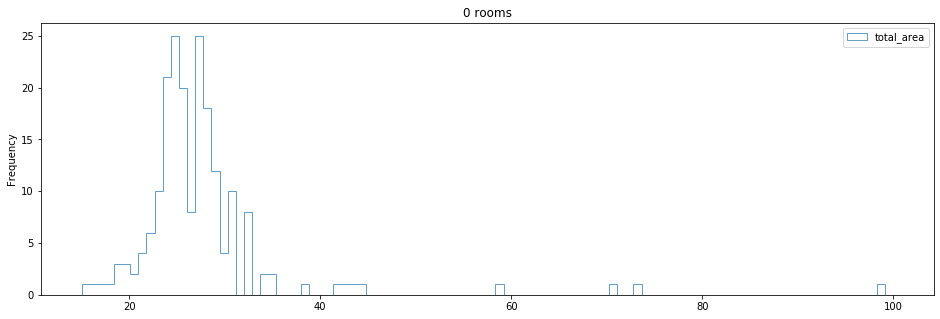

In [14]:
df[df['rooms'] == 0]['total_area'].plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(15,100),
    bins=100,
    linewidth=1,
    alpha=0.7,
    label='total_area',
    title='0 rooms',
    legend=True,
    figsize=(16,5)
)

Как мы видим среди квартир с `0` комнат значительная часть меньше 40 кв.м.
Скорректируем данные количества комнат по общей площади помещения, воспользовавшись медианными значениями выше:

In [15]:
df.loc[(df['rooms'] == 0) & (df['total_area'] <= 45), 'rooms'] = 1
df.loc[(df['rooms'] == 0) & (df['total_area'] <= 60), 'rooms'] = 2
df.loc[(df['rooms'] == 0) & (df['total_area'] <= 80), 'rooms'] = 3
df.loc[(df['rooms'] == 0) & (df['total_area'] <= 100), 'rooms'] = 4

In [16]:
df[df['rooms'] == 0].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,5.0,"71,000,000.0",371.0,0.0,3.6,7.0,nan,6.0,nan,nan,"25,257.0","6,060.0",1.0,761.0,1.0,584.0,90.0
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,5.0,"71,000,000.0",371.0,0.0,3.6,7.0,nan,6.0,nan,nan,"25,257.0","6,060.0",1.0,761.0,1.0,584.0,90.0
25%,5.0,"71,000,000.0",371.0,0.0,3.6,7.0,nan,6.0,nan,nan,"25,257.0","6,060.0",1.0,761.0,1.0,584.0,90.0
50%,5.0,"71,000,000.0",371.0,0.0,3.6,7.0,nan,6.0,nan,nan,"25,257.0","6,060.0",1.0,761.0,1.0,584.0,90.0
75%,5.0,"71,000,000.0",371.0,0.0,3.6,7.0,nan,6.0,nan,nan,"25,257.0","6,060.0",1.0,761.0,1.0,584.0,90.0
max,5.0,"71,000,000.0",371.0,0.0,3.6,7.0,nan,6.0,nan,nan,"25,257.0","6,060.0",1.0,761.0,1.0,584.0,90.0


Столбец `locality_name` невозможно заполнить без дополнительных источников. Причина пропуска может быть элекментарной забывчивостью пользователя заполнить данное поле. В качестве решения данной проблемы, можно использовать автоопределение места пользователя по IP и предлагать при создании объявления данный населенный пункт, либо так же предлагать `родной город`, заполняемый при регистрации.
Если мы обратимся к столбцам, хранящим информацию по **жилому пространству и пространству кухонной зоны `living_area` и `kitchen_area`**, то процент пропусков также достаточно высоке - около 9%, что может сказаться на исследовании. Заменим пропуски медианными значениями по помещениям, при небольшом разбросе.

Медиана для кухонного пространства равна 0.1724137931034483


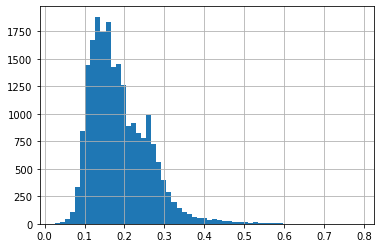

Медиана для жилого пространства равна 0.5678598992678503


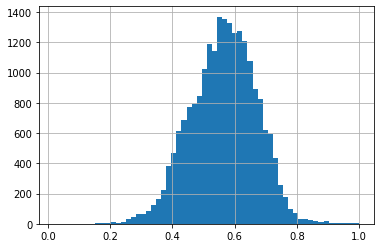

In [17]:
median_kitchen = (df['kitchen_area'] / df['total_area']).median()
print('Медиана для кухонного пространства равна', median_kitchen)
(df['kitchen_area'] / df['total_area']).hist(bins=60)
plt.show()

median_living = (df['living_area'] / df['total_area']).median()
print('Медиана для жилого пространства равна', median_living)
(df['living_area'] / df['total_area']).hist(bins=60)
plt.show()

Как мы видим большая часть квартир распределилась c коэффициентами `0,17` для кухни и `0,57` для жилого пространства.

Заменим пустые значения на медианные от общего числа:

In [18]:
df['kitchen_area'] = df['kitchen_area'].fillna(value = (median_kitchen * df['total_area']))
df['living_area'] = df['living_area'].fillna(value = (median_living * df['total_area']))

В столбце `balcony` хранится информация о количестве балконов в апартаментах. Отсутствие каких-либо данных можно объяснить отсутствием балконов в помещениях, поэтому заполним пропуски нулями. 

In [19]:
df['balcony'] = df['balcony'].fillna(value = 0)

**В столбце `is_apartment` и `studio`** хранятся булевы значения, относящие помещение к типу `квартира` либо `студия`.
Чтобы уменьшить объем занимаемой памяти и упростить чтение таблицы, вынесем эти данных в отдельную группу в столбце `flat_type`, где:
- A — квартира `apartment` с одной или несколькими комнатами;
- S — студия `studio` с одной единственной комнатой.

Так как столбец `studio` у нас полностью заполнен? в его значениях есть только True и False и нет противоречащих записей одновременно студия и квартира, будем ориентироваться на него.

In [20]:
df['studio'].unique()

array([False,  True])

In [21]:
df.query('studio == True and is_apartment == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [22]:
def flat_type_definition(row):
    apartment = row['is_apartment']
    studio = row['studio']
    
    if studio == True:
        return 'S'
    else:
        return 'A'

In [23]:
df['flat_type'] = df.apply(flat_type_definition, axis=1)

И удалим лишние столбцы:

In [24]:
df.drop(columns = ['is_apartment', 'studio'], axis = 1, inplace=True)

К сожалению, **столбцы `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest`** никак заполнить по получится, поэтому рекомендуется заполнить их значениями-заглушками, чтобы можно было работать с данными.

In [25]:
df['airports_nearest'] = df['airports_nearest'].fillna(-1)
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(-1)
df['parks_nearest'] = df['parks_nearest'].fillna(-1)
df['ponds_nearest'] = df['ponds_nearest'].fillna(-1)

А пропуски в **`days_exposition`** нужно передать специалистам по выгрузке данных, чтобы они проверили систему и дополнили недостающую информацию.

Проверим еще раз столбцы на наличие пропусков с учетом выше сказанного:

In [26]:
for column in [
    'ceiling_height', 'floors_total', 'living_area','kitchen_area', 'balcony'
]:
    print(f'Количество пропусков в столбце {column}:', len(df[df[column].isna()]))
    k = len(df[df[column].isna()]) / df.shape[0]
    print(f'Таким образом доля незаполненных данных составляет: {k:.1%}\n')

Количество пропусков в столбце ceiling_height: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце floors_total: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце living_area: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце kitchen_area: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце balcony: 0
Таким образом доля незаполненных данных составляет: 0.0%



In [27]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,"23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","23,699.0","18,181.0","23,699.0","18,181.0","23,699.0","20,518.0"
mean,9.9,"6,541,548.8",60.3,2.1,2.7,10.7,34.6,5.9,10.5,0.6,"22,060.1","10,886.2",0.6,166.7,0.8,198.5,180.9
std,5.7,"10,887,013.3",35.7,1.1,1.0,6.6,22.3,4.9,6.0,1.0,"16,455.6","9,634.9",0.8,307.1,0.9,305.6,219.7
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,1.0
25%,6.0,"3,400,000.0",40.0,1.0,2.6,5.0,19.0,2.0,7.0,0.0,"10,196.5","2,242.0",0.0,-1.0,0.0,-1.0,45.0
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.0,0.0,"21,869.0","11,247.0",0.0,-1.0,1.0,-1.0,95.0
75%,14.0,"6,800,000.0",69.9,3.0,2.7,16.0,42.1,8.0,12.0,1.0,"34,327.0","15,248.5",1.0,301.0,1.0,389.0,232.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0"


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 21 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           23699 non-null float64
ponds_around_3000       18181 non-null float64
ponds_nearest           23699 non-null float64
days_expo

Теперь для удобства восприятия изменим тип данных с `вещественных чисел`, на `целые числа` для следующих столбцов: `floors_total`, `balcony`, `living_area`, `kitchen_area`, так как содержат данные с точностью, в которой нет необходимости.

In [29]:
for column in [
    'floors_total', 'balcony', 'total_area', 'living_area', 'kitchen_area'
]:
    df[column] = df[column].astype('int')

Выведем полученную таблицу:

In [30]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,open_plan,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,flat_type
0,20,"13,000,000.0",108,2019-03-07T00:00:00,3,2.7,16,51,8,False,...,0,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,nan,A
1,7,"3,350,000.0",40,2018-12-04T00:00:00,1,2.6,11,18,1,False,...,2,посёлок Шушары,"12,817.0","18,603.0",0.0,-1.0,0.0,-1.0,81.0,A
2,10,"5,196,000.0",56,2015-08-20T00:00:00,2,2.6,5,34,4,False,...,0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0,A
3,0,"64,900,000.0",159,2015-07-24T00:00:00,3,2.6,14,90,9,False,...,0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0,A
4,2,"10,000,000.0",100,2018-06-19T00:00:00,2,3.0,14,32,13,False,...,0,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0,A


#### **Выводы**

По итогу предобработки пропусков в данных сделан следующий вывод:
* `часть пользователей не указала информацию по площади, этажам и месторасположению`при заполнении данных,
* `присутствует много пропусков в информации по ближайшим объектам` на основании картографических данных,
* `не выгрузилась часть информации по времени жизни объявления`.

***Рекомендовано подгружать информацию о месторасположении на основании IP адреса или адреса, указанного при регистрации***

***Можно ввести "Бланк заполненности" объявления, чтобы пользователь видел, какую информацию он забыл указать, которая поможет быстрее найти потенциальных покупателей.***

***Также необходимо связаться с инженерами данных, предоставившими информацию и узнать природу происхождения пропущенных значений в статистических данных с сайта. Вероятнее всего пропуски в этих данных говорят, что объяявление так и не было закрыто, т.е. не жилье не нашло своего покупателя.***

### 3. Явные дубликаты

Для начала выведем на экран количество явных дубликатов в нашем датафрейме:

In [31]:
df.duplicated().sum()

0

Как видим, дубликатов в наших данных нет.

#### **Выводы**

По итогу предобработки явных дубликатов в данных аномалий выявлено не было.


### **Выводы**

По итогу предобработки данных сделаны следующие выводы:
* Часть пользователей не указала информацию по площади, этажам и месторасположению при заполнении данных. Для решения этой проблемы рекомендуется подгружать информацию о месторасположении на основании IP адреса или адреса, указанного при регистрации. Также можно ввести "Бланк заполненности" объявления, чтобы пользователь видел, какую информацию он забыл указать, которая поможет быстрее найти потенциальных покупателей.
* Присутствует много пропусков в информации по ближайшим объектам на основании картографических данных, использующихся в качестве дополнительной информации. Возможно, эти пропуски связаны с неполненными данными в других связанных ячейках. 
* Не выгрузилась часть информации по времени жизни объявления. Необходимо связаться с инженерами данных, предоставившими информацию и узнать природу происхождения пропущенных значений в статистических данных с сайта. Вероятнее всего пропуски в этих данных говорят, что объяявление так и не было закрыто, т.е. не жилье не нашло своего покупателя.

## **III. Расчёты и добавление результатов в таблицу**

### 1. Цена квадратного метра

Одним из параметров для оценки жилья будет использовать цену квадратного метра. Для этого высчитаем его как цену жилья `last_price` поделенный на общий метраж квартиры `total_area` и добавим столбец `quad_meter_cost` в таблицу и округлим сразу до целых:

In [32]:
df['quad_meter_cost'] = (df['last_price'] / df['total_area']).astype('int')

### 2. Категоризация этажа

Следующим шагом выполним категоризацию исходных данных по `этажу` по следующей логике:
* `Первый` — помещение на первом этаже
* `Последний` — помещение на последнем этаже
* `Другой` — остальные помещения

Для этого напишем функцию `floor_group` и применим с помощью метода `apply` к нашему датафрейму:

In [33]:
def floor_group(row):
    floor = row['floor']
    floors = row['floors_total']
    
    if floor == 1:
        return 'Первый'
    if floor == floors:
        return 'Последний'
    else:
        return 'Другой'

In [34]:
df['floor_type'] = df.apply(floor_group, axis=1)

### 3. Соотношение площадей

Ранее мы уже использовали коэффициент отношения жилой и кухонной площади к общей. Теперь добавим эти данные в таблицу:

In [35]:
df['attitude_kitchen_to_total'] = df['kitchen_area'] / df['total_area']
df['attitude_living_to_total'] = df['living_area'] / df['total_area']

### 4. Данные по времени

В исходной таблице у нас общая информация об времени публикации объявления. Для дальнейшего исследования добавим дополнительно в таблицу информацию по дню недели, месяцу и году публикации объявления.

In [36]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,open_plan,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,flat_type,quad_meter_cost,floor_type,attitude_kitchen_to_total,attitude_living_to_total
0,20,"13,000,000.0",108,2019-03-07T00:00:00,3,2.7,16,51,8,False,...,1.0,482.0,2.0,755.0,nan,A,120370,Другой,0.2,0.5
1,7,"3,350,000.0",40,2018-12-04T00:00:00,1,2.6,11,18,1,False,...,0.0,-1.0,0.0,-1.0,81.0,A,83750,Первый,0.3,0.5
2,10,"5,196,000.0",56,2015-08-20T00:00:00,2,2.6,5,34,4,False,...,1.0,90.0,2.0,574.0,558.0,A,92785,Другой,0.1,0.6
3,0,"64,900,000.0",159,2015-07-24T00:00:00,3,2.6,14,90,9,False,...,2.0,84.0,3.0,234.0,424.0,A,408176,Другой,0.2,0.6
4,2,"10,000,000.0",100,2018-06-19T00:00:00,2,3.0,14,32,13,False,...,2.0,112.0,1.0,48.0,121.0,A,100000,Другой,0.4,0.3


In [37]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [38]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['day'] = df['first_day_exposition'].dt.weekday

Выведем на экран полученную таблицу:

In [39]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,open_plan,...,ponds_nearest,days_exposition,flat_type,quad_meter_cost,floor_type,attitude_kitchen_to_total,attitude_living_to_total,month,year,day
0,20,"13,000,000.0",108,2019-03-07,3,2.7,16,51,8,False,...,755.0,nan,A,120370,Другой,0.2,0.5,3,2019,3
1,7,"3,350,000.0",40,2018-12-04,1,2.6,11,18,1,False,...,-1.0,81.0,A,83750,Первый,0.3,0.5,12,2018,1
2,10,"5,196,000.0",56,2015-08-20,2,2.6,5,34,4,False,...,574.0,558.0,A,92785,Другой,0.1,0.6,8,2015,3
3,0,"64,900,000.0",159,2015-07-24,3,2.6,14,90,9,False,...,234.0,424.0,A,408176,Другой,0.2,0.6,7,2015,4
4,2,"10,000,000.0",100,2018-06-19,2,3.0,14,32,13,False,...,48.0,121.0,A,100000,Другой,0.4,0.3,6,2018,1


Переиндексируем колонки для визуального удобства чтения с помощью `reindex`:

In [40]:
df = df.reindex(columns=['flat_type', 'last_price', 'locality_name', 'total_images', 'floor_type', 'floor', 
                         'floors_total', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'balcony', 
                         'ceiling_height', 'open_plan', 'airports_nearest', 'city_centers_nearest', 'parks_around_3000',
                         'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition', 'quad_meter_cost',
                         'attitude_kitchen_to_total', 'attitude_living_to_total', 'first_day_exposition', 'month', 'year', 'day'
                        ]
               )

In [41]:
df.head()

,flat_type,last_price,locality_name,total_images,floor_type,floor,floors_total,total_area,living_area,kitchen_area,...,ponds_around_3000,ponds_nearest,days_exposition,quad_meter_cost,attitude_kitchen_to_total,attitude_living_to_total,first_day_exposition,month,year,day
0,A,"13,000,000.0",Санкт-Петербург,20,Другой,8,16,108,51,25,...,2.0,755.0,nan,120370,0.2,0.5,2019-03-07,3,2019,3
1,A,"3,350,000.0",посёлок Шушары,7,Первый,1,11,40,18,11,...,0.0,-1.0,81.0,83750,0.3,0.5,2018-12-04,12,2018,1
2,A,"5,196,000.0",Санкт-Петербург,10,Другой,4,5,56,34,8,...,2.0,574.0,558.0,92785,0.1,0.6,2015-08-20,8,2015,3
3,A,"64,900,000.0",Санкт-Петербург,0,Другой,9,14,159,90,27,...,3.0,234.0,424.0,408176,0.2,0.6,2015-07-24,7,2015,4
4,A,"10,000,000.0",Санкт-Петербург,2,Другой,13,14,100,32,41,...,1.0,48.0,121.0,100000,0.4,0.3,2018-06-19,6,2018,1


### **Выводы**

По итогу дополнительной обработки данных было выполнено:
* Дополнительно были добавлены столбцы в исходный датафрейм для дальнейшего исследования
* Были категоризованы данные по типу жилого помещения для уменьшения занимаемого объема памяти

## **IV. Исследование данных**

Используя обработанные исходные данные исследуем их с целью решения поставленных задач.

### 1. Основные параметры по жилью
Для начала изучим основным параметры по жилью, а именно: площадь, цена, число комнат, высота потолков.

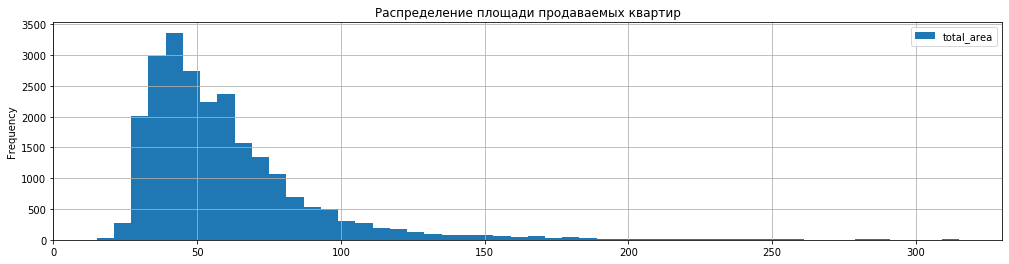

In [42]:
df.plot(y='total_area', kind='hist', bins=50, range=(15, 315), grid=True, figsize=(17,4), 
        title='Распределение площади продаваемых квартир')

Основной объем приходится на объявления с площадью до 120 кв.м. Построим ящик с усами 

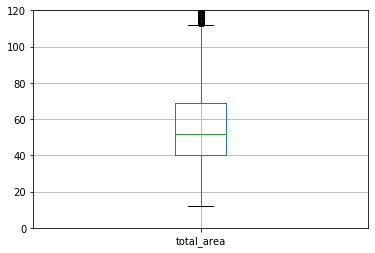

In [43]:
df.boxplot(column='total_area')
plt.ylim(0, 120)
plt.show()

Нижний «ус» упирается находится примерно на 15 кв.м, что соответствует минимальному значению. Верхний заканчивается около 115 — это 1,6 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, будем считать выбросом. Причем эти выбросы редки, что хорошо видно по смещению медианы к нижней части.

Также изучим другие параметры:

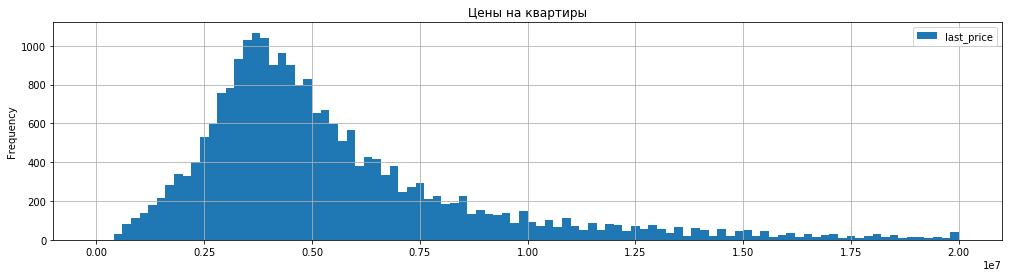

In [44]:
df.plot(y='last_price', kind='hist', bins=100, range=(0, 20000000), grid=True, figsize=(17,4), 
        title='Цены на квартиры')

Больше всего квартир на рынке с ценой меньше 10 миллионов. Основной пик приходится на отрезок с 3 до 4 миллионов.

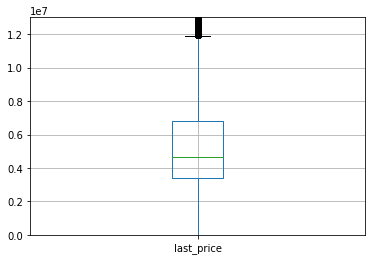

In [45]:
df.boxplot(column='last_price')
plt.ylim(0, 13000000)
plt.show()

Верхняя граница отрезает выше 11,8 млн. Все что выше считается выбросами. Медиана также смещена к нижней границе.

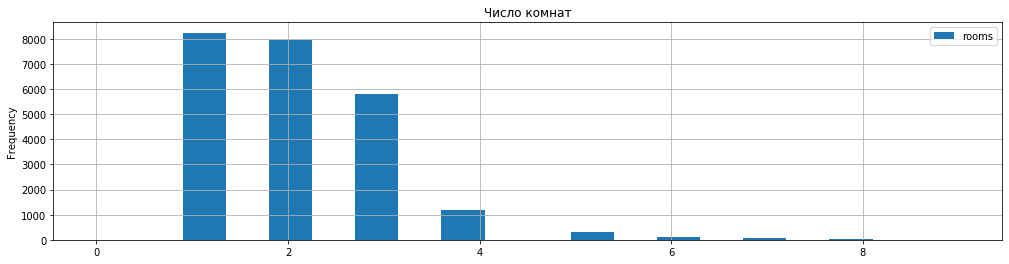

In [46]:
df.plot(y='rooms', kind='hist', bins=20, range=(0, 9), grid=True, figsize=(17,4), 
        title='Число комнат')

Здесь ситуация складывается следующим образом: рынок сейчас наполнен небольшими квартирами и студиями. Количество четырехкомнатных квартир не велико.

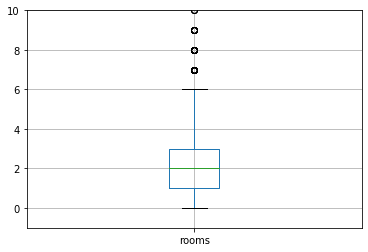

In [47]:
df.boxplot(column='rooms')
plt.ylim(-1, 10)
plt.show()

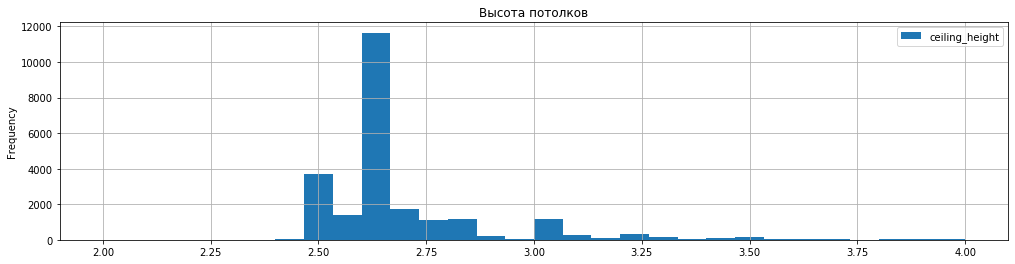

In [48]:
df.plot(y='ceiling_height', kind='hist', bins=30, range=(2, 4), grid=True, figsize=(17,4), 
        title='Высота потолков')

По высоте потолков можно сказать, что преобладают жилые помещения со стандартной типовой застройкой с высотой потолков 2,5-2,7 м.

При построении ящика с усами зададим границы 2,4м (минимально разрешенная высота потолков) и 3м (высота потолков в сталинской застройке)

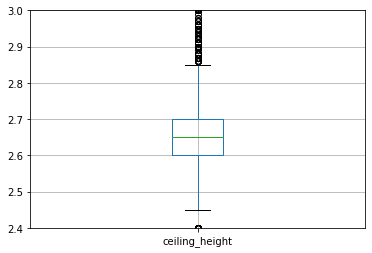

In [49]:
df.boxplot(column='ceiling_height')
plt.ylim(2.4, 3)
plt.show()

Теперь выведем все проиллюстрированные данные в виде числовых данных:

In [50]:
df[['total_area', 'last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,"23,699.0","23,699.0","23,699.0","23,699.0"
mean,60.1,"6,541,548.8",2.1,2.7
std,35.7,"10,887,013.3",1.1,1.0
min,12.0,"12,190.0",0.0,1.0
25%,40.0,"3,400,000.0",1.0,2.6
50%,52.0,"4,650,000.0",2.0,2.6
75%,69.0,"6,800,000.0",3.0,2.7
max,900.0,"763,000,000.0",19.0,100.0


#### **Выводы**
- в полученных ранее данных преобладают квартиры с типовой высотой потолков 2,5-2,7м
- рынок сейчас наполнен небольшими квартирами и студиями. Количество четырехкомнатных квартир не велико
- больше всего квартир на рынке с ценой меньше 10 миллионов. Основной пик приходится на отрезок с 3 до 4 миллионов
- чаще всего на рынке квартир встречаются помещения общей площадью от 40 до 70 кв.м

### 2. Время продажи
Изучим время продажи квартир с момента его размещения.

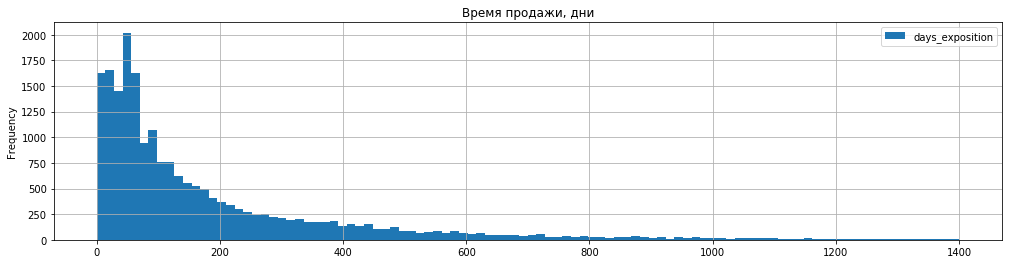

In [51]:
df.plot(y='days_exposition', kind='hist', bins=100, range=(0, 1400), grid=True, figsize=(17,4), 
        title='Время продажи, дни')

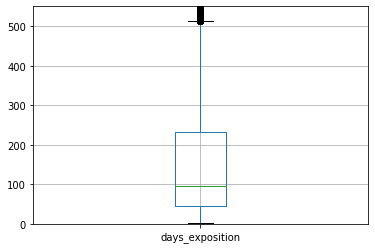

In [52]:
df.boxplot(column='days_exposition')
plt.ylim(0, 550)
plt.show()

Нетипично долгие продажи признаем выбросами и отбросим. 
Во-первых, их немного. Во-вторых, скорее всего, такие объявления давно заброшенные. Например, пользователь мог выложить объявления сразу на несколько ресурсов и забыл про сервис Яндекс.Недвижимость после продажи на стороннем ресурсе, либо заполнил недостаточно информации для заинтересованности потенциальных покупателей, что привело к потере интереса.
За границу слишком долгой продажи возьмем 500 дней. После этого времени количество продаж идет на ощутимый спад, а после 1400 и вовсе практически сливается с 0.

In [53]:
df_true_days = df.query('days_exposition < 500')
pass

Другой крайностью обычно являются очень быстрые продажи: в пределах недели. Проверим на срезе двух месяцев.

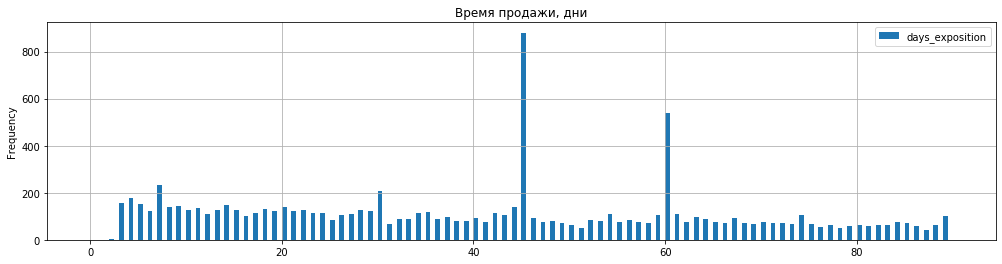

In [54]:
df.plot(y='days_exposition', kind='hist', bins=180, range=(0, 90), grid=True, figsize=(17,4), 
        title='Время продажи, дни')

Согласно ящику с усами нижняя квартиль соответствует 41 дням, в то время как медианное значение равняется примерно 84 дня.

In [55]:
df_true_days['days_exposition'].describe()

count   18,764.0
mean       127.0
std        119.1
min          1.0
25%         41.0
50%         84.0
75%        181.0
max        499.0
Name: days_exposition, dtype: float64

#### **Выводы**
Таким образом, можно сделать **вывод**, что интерес к покупке нового жилья в течении месяца держится примерно на одном уровне, потом начинает снижиться. На 45 и 60 день происходит всплеск интереса у потенциальных покупателей и в этот период происходит больше всего сделок. Скорее всего это связано с изменением изначальной цены в этот период владельцем жилья, что вызывает всплеск интереса. Еще одним объяснением может быть фиксированный таймер жизни объявления, по истечении которого пользователю необходимо подтвердить продление, в ином случае оно будет автоматически закрыто. Для этого необходимо уточнить у специалистов настройки системы публикации и закрытия.

### 3. Какие факторы больше всего влияют на стоимость квартиры? 

Изучим зависимость цены квартиры от:
1. Общей площади
2. Числа комнат
3. Удаленности от центра
4. Располагаемом этаже - первый, последний или другой
5. Даты размещения - дня недели, месяца, года

Построим графики зависимости этих параметров:

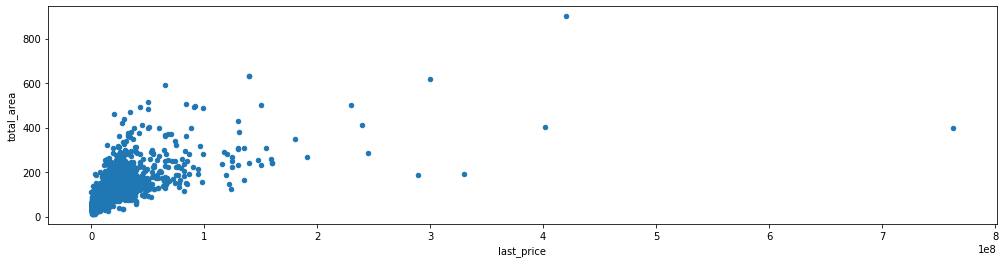

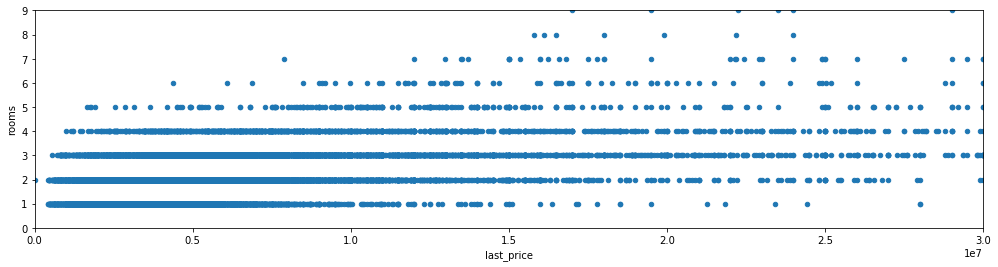

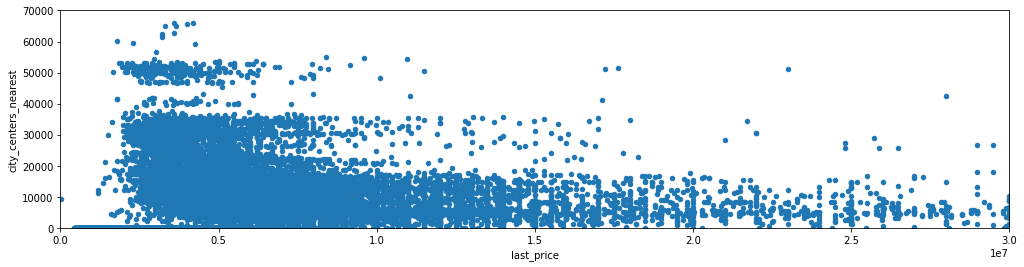

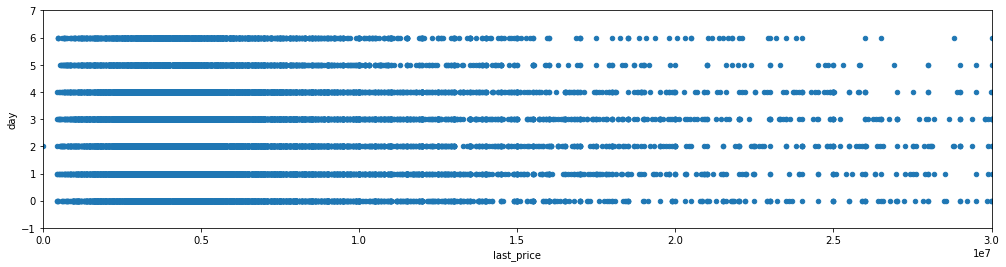

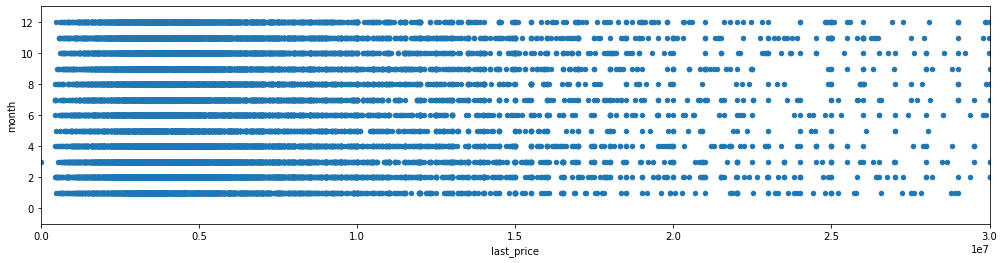

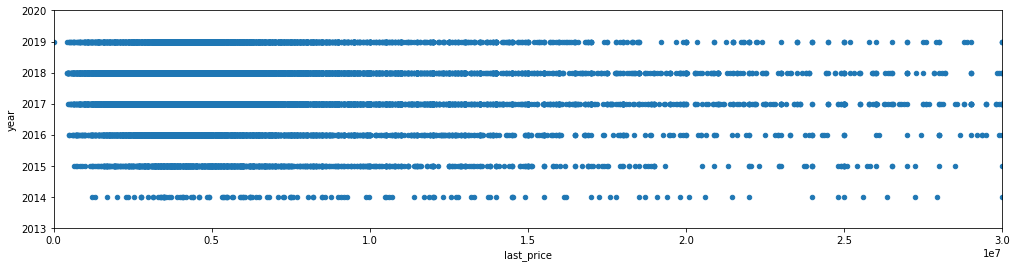

In [56]:
df.plot(x='last_price', y='total_area', kind='scatter', figsize=(17,4))
df.plot(x='last_price', y='rooms', kind='scatter', figsize=(17,4), xlim=(0, 30000000), ylim=(0, 9))
df.plot(x='last_price', y='city_centers_nearest', kind='scatter', figsize=(17,4), xlim=(0, 30000000), ylim=(0, 70000))
df.plot(x='last_price', y='day', kind='scatter', figsize=(17,4), xlim=(0, 30000000), ylim=(-1, 7))
df.plot(x='last_price', y='month', kind='scatter', figsize=(17,4), xlim=(0, 30000000), ylim=(-1, 13))
df.plot(x='last_price', y='year', kind='scatter', figsize=(17,4), xlim=(0, 30000000), ylim=(2013, 2020))

Дополнительно выведем на экран коэффициенты корреляции Пирсона:

In [57]:
df[['last_price', 'total_area', 'rooms', 'city_centers_nearest', 'floor_type', 'day', 'month', 'year']].corr()

,last_price,total_area,rooms,city_centers_nearest,day,month,year
last_price,1.0,0.7,0.4,-0.1,0.0,0.0,-0.0
total_area,0.7,1.0,0.8,-0.1,-0.0,0.0,-0.1
rooms,0.4,0.8,1.0,-0.1,-0.0,-0.0,-0.1
city_centers_nearest,-0.1,-0.1,-0.1,1.0,0.0,-0.0,-0.0
day,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0
month,0.0,0.0,-0.0,-0.0,0.0,1.0,-0.3
year,-0.0,-0.1,-0.1,-0.0,-0.0,-0.3,1.0


Для дня недели, месяца и года также сформируем сводную таблицу 

In [58]:
display(df.pivot_table(index='day', values='last_price', aggfunc=('mean','median')))
display(df.pivot_table(index='month', values='last_price', aggfunc=('mean','median')))
display(df.pivot_table(index='year', values='last_price', aggfunc=('mean','median','count')))

,mean,median
day,,
0,"6,511,613.4","4,650,000.0"
1,"6,394,233.4","4,730,000.0"
2,"6,627,970.4","4,700,000.0"
3,"6,708,663.2","4,650,000.0"
4,"6,372,130.6","4,585,000.0"
5,"6,976,803.9","4,555,000.0"
6,"6,246,180.3","4,550,000.0"


,mean,median
month,,
1,"6,668,233.1","4,600,000.0"
2,"6,468,500.1","4,650,000.0"
3,"6,359,275.5","4,650,000.0"
4,"6,737,198.5","4,800,000.0"
5,"6,600,435.2","4,515,000.0"
6,"6,310,269.4","4,400,000.0"
7,"6,649,337.5","4,650,000.0"
8,"6,350,233.0","4,570,000.0"
9,"6,825,470.2","4,700,000.0"


,count,mean,median
year,,,
2014,137,"12,087,135.9","7,700,000.0"
2015,1191,"8,572,833.3","5,350,000.0"
2016,2783,"6,827,912.2","4,550,000.0"
2017,8190,"6,585,729.3","4,500,000.0"
2018,8519,"5,950,966.4","4,550,000.0"
2019,2879,"6,782,388.4","5,050,000.0"


In [59]:
index = df.index 

In [60]:
ad_df = df.pivot_table(index=index, values=['day', 'month', 'year', 'quad_meter_cost'], aggfunc='mean')
ad_df.corr()

,day,month,quad_meter_cost,year
day,1.0,0.0,-0.0,-0.0
month,0.0,1.0,-0.0,-0.3
quad_meter_cost,-0.0,-0.0,1.0,0.0
year,-0.0,-0.3,0.0,1.0


Применим матричный метод для отрисовки зависимостей.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3d39204d0>,
      dtype=object)

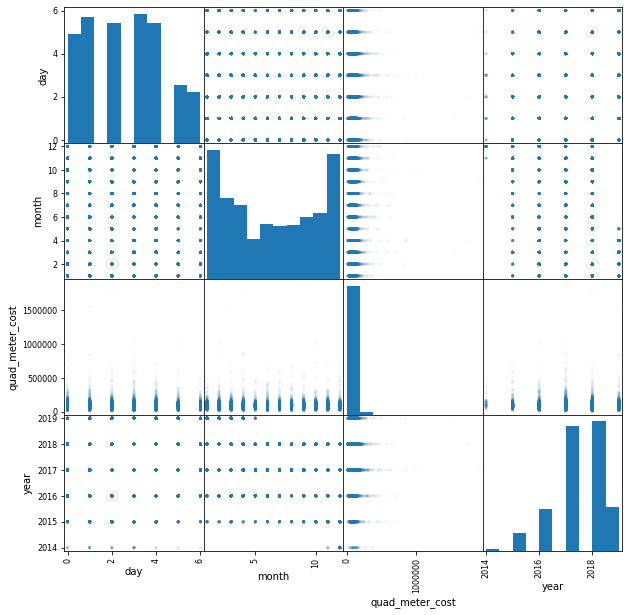

In [61]:
pd.plotting.scatter_matrix(ad_df, figsize=(10, 10), alpha=0.03)

И для этажа размещения квартиры

In [62]:
df.pivot_table(index='floor_type', values='last_price', aggfunc=('mean','median'))

,mean,median
floor_type,,
Другой,"6,676,061.4","4,850,000.0"
Первый,"4,803,560.2","3,900,000.0"
Последний,"7,356,776.9","4,300,000.0"


#### **Выводы** 
Исходя из представленных зависимостей, можно сделать уверенные заявления:
* рост цены напрямую связан с общей площадью квартиры
* повышение цены напрямую связано с количеством комнат, однако при определении цены есть сторонние факторы, вносящие свое влияние в формирование цены. Также для квартир с 4 и больше комнатами интерес покупателей, а соответственно и финальная цена начинает падать. то же можно сказать и об общем метраже квартиры: стоимость за кв.м. падает с 75 кв.м.
* цена на квартиру тем выше, чем ближе она находится к центру города
* явной зависимости цены от дня и месяца нет, однако можно предположить, основываясь на данных, что в начале недели объявления о продаже имеют больший ценник на жилье, нежели в конце. По месяцам же обратная ситуация, ближе к концу года - цены на квартиры повышаются. Возможно, это связано с перепродажей построенных новостроек и сданных их покупателям на стадии котлована (одно из предположений)
* с ценами на жилье относительно прошедших лет всё неоднозначно. Прямой зависимости нет, однако виден всплеск роста цен на квартиры в 2014 году, а потом постепенное снижение до стабильного уровня. Это можно связать с внешними факторами: кризисом, депрессией или другими внешне политическими событиями.
* однако помимо этого в 2014 году замечен и самый низкий уровень продаж квартир, который может быть связан всё с теми же событиями.
* самый же пик продаж приходится на 2017-2018 года.
* жилые помещения на первом этаже обладают наименьшими ценами, что связано с личными предпочтениями людей, наибольшими же ценами обладают те, что размещены на других этажах.

### 4. Места наибольших предложений квартир

Найдем населенные пункты с наибольшим количеством размещенных объявлений:

In [63]:
top_cities = (df.pivot_table(index='locality_name', values='quad_meter_cost', aggfunc=('count', 'mean'))
    .sort_values(by='count', ascending=False)
    .head(10))
display(top_cities)

,count,mean
locality_name,,
Санкт-Петербург,"15,721.0","115,347.3"
посёлок Мурино,522.0,"86,379.5"
посёлок Шушары,440.0,"79,068.2"
Всеволожск,398.0,"68,984.8"
Пушкин,369.0,"103,610.9"
Колпино,338.0,"75,735.2"
посёлок Парголово,327.0,"90,675.2"
Гатчина,307.0,"69,045.1"
деревня Кудрово,299.0,"93,001.7"


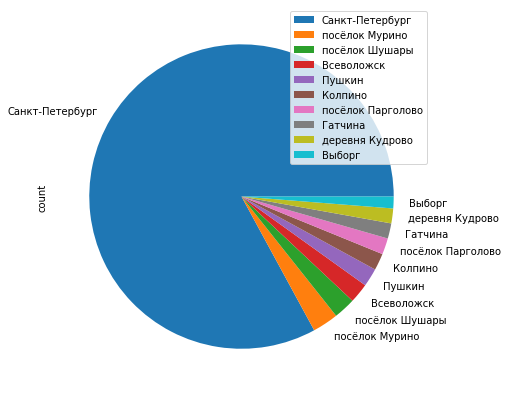

In [64]:
top_cities.plot(y='count', kind='pie', figsize=(7, 7))

Таким образом, получается что больше всего предложений о продаже жилья в Санкт-Петербурге, причем существенно больше. Средняя цена также выше, однако в средних ценах также выбиваются Пушкин, Парголово и Кудрово. Возможно, это связано с новым строительством жилых домов и кварталов, а также повышенным статусом района.

In [65]:
(df
 .query('locality_name in @top_cities.index')
 .groupby(['locality_name'])
 ['quad_meter_cost'].agg(['min','max'])
 .reset_index()
 .sort_values(by=['max'], ascending=False))

,locality_name,min,max
5,Санкт-Петербург,111,1907500
0,Всеволожск,31400,642444
4,Пушкин,59836,256521
9,посёлок Шушары,47766,147826
2,Гатчина,10507,146315
6,деревня Кудрово,54336,142857
8,посёлок Парголово,39303,141891
7,посёлок Мурино,50000,140312
3,Колпино,48214,125000
1,Выборг,18750,107473


В Санкт-Петербурге присутствуют аномально низкие цены. Узнаем медианное значение для данного населенного пункта и заменим все что ниже крайнего значения квартили на это значение. 

In [66]:
df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['quad_meter_cost'] <= 70000)]['quad_meter_cost'].describe()

count      350.0
mean    63,538.0
std      9,179.5
min        111.0
25%     62,674.0
50%     66,233.0
75%     68,333.0
max     70,000.0
Name: quad_meter_cost, dtype: float64

In [67]:
df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['quad_meter_cost'] <= 70000), 'quad_meter_cost'] = df[df['locality_name'] == 'Санкт-Петербург'].median()

Еще раз выведдем на экран минимальные и максимальные значения значения

In [68]:
top_cities_meter_cost = (df
 .query('locality_name in @top_cities.index')
 .groupby(['locality_name'])
 ['quad_meter_cost'].agg(['min','max'])
 .reset_index())

top_cities_meter_cost.columns = ['city', 'quad_meter_cost_min', 'quad_meter_cost_max']

top_cities_meter_cost.sort_values(by=['quad_meter_cost_max'], ascending=False)

,city,quad_meter_cost_min,quad_meter_cost_max
5,Санкт-Петербург,"70,065.0","1,907,500.0"
0,Всеволожск,"31,400.0","642,444.0"
4,Пушкин,"59,836.0","256,521.0"
9,посёлок Шушары,"47,766.0","147,826.0"
2,Гатчина,"10,507.0","146,315.0"
6,деревня Кудрово,"54,336.0","142,857.0"
8,посёлок Парголово,"39,303.0","141,891.0"
7,посёлок Мурино,"50,000.0","140,312.0"
3,Колпино,"48,214.0","125,000.0"
1,Выборг,"18,750.0","107,473.0"


#### **Выводы** 
* больше всего предложений о продаже жилья в Санкт-Петербурге
* cредняя цена также выше в Санкт-Петербурге, однако в средних ценах также выбиваются Пушкин, Парголово и Кудрово. Возможно, это связано с новым строительством жилых домов и кварталов, а также повышенным статусом района.
* самая высокая цена за квадратный метр в Санкт-Петербурге, а самая низкая в Выборге.

### 5. Определение понятия центра
Далее выделяем квартиры в Санкт-Петербурге и смотрим, какая область войдёт в центр. Расстояние до центра сделаем в км и округлим. Посчитаем среднюю цену для каждого км. И после построим график, который покажет, как цена зависит от удаленности от центра.

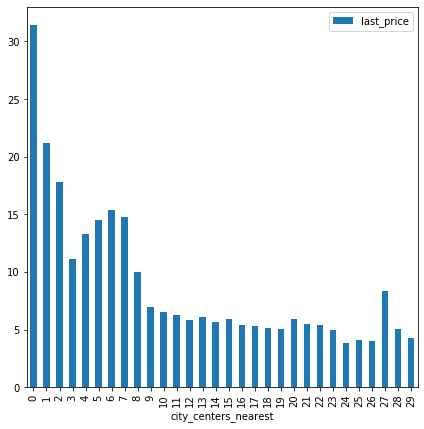

In [69]:
just_spb = df.query('locality_name == "Санкт-Петербург"')
just_spb = just_spb.query('city_centers_nearest != -1')
just_spb_price = just_spb.loc[:, ['locality_name', 'city_centers_nearest', 'last_price']]
#приводим расстояние в км, округляем
just_spb_price['city_centers_nearest'] = (just_spb_price['city_centers_nearest'] / 1000).round().astype(int)
#приводим цену в млн
just_spb_price['last_price'] = just_spb_price['last_price'] / 1000000
just_spb_price_pivot = just_spb_price.pivot_table(index='city_centers_nearest', values='last_price', aggfunc=('mean'))
just_spb_price_pivot.plot(y='last_price', kind='bar', figsize=(7, 7))

Выведем количество поданных объявлений относительно 10 км.

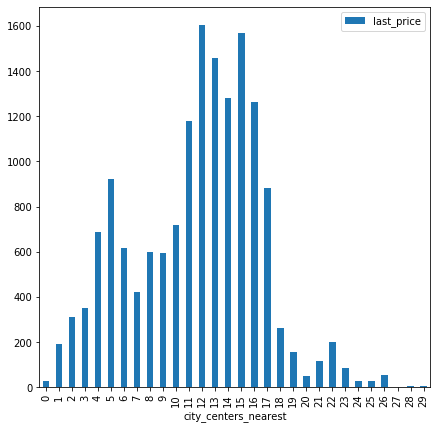

In [70]:
(just_spb_price
 .pivot_table(index='city_centers_nearest', values='last_price', aggfunc=('count'))
 .plot(y='last_price', kind='bar', figsize=(7, 7)))

Выведем цены за квартиры относительно выбранного расстояния 0-7км для всего сервиса

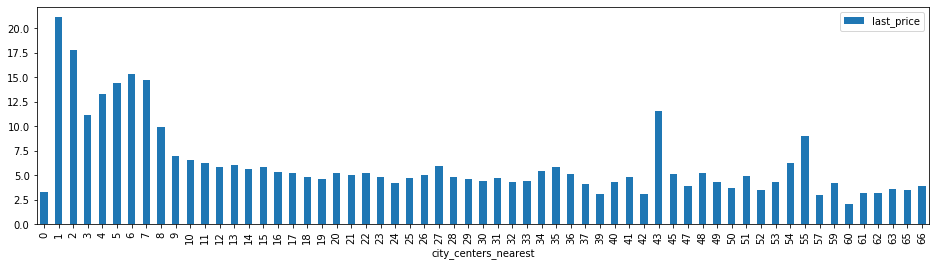

In [94]:
df_price = df.loc[:, ['locality_name', 'city_centers_nearest', 'last_price']]
#приводим расстояние в км, округляем
df_price['city_centers_nearest'] = (df_price['city_centers_nearest'] / 1000).round().astype(int)
#приводим цену в млн
df_price['last_price'] = df_price['last_price'] / 1000000
df_price_pivot = df_price.pivot_table(index='city_centers_nearest', values='last_price', aggfunc=('mean'))
df_price_pivot.plot(y='last_price', kind='bar', figsize=(16, 4))

Исходя из данных для СПб цена с 3 км начинает падать, но с 4 по 7 км есть всплеск стоимости, возможно это связано с неразвитой инфраструктурой на 3 км (нет больших ТЦ, далеко от метро и транспортных развязок и т.д.), затем наблюдается стабильный рост на 5-7 км. Центром будем считать расстояние с 0 до 7 км.

Относительно других населенных пунктов теденция сохраняется.

Посмотрим на квартиры в центре Санкт-Петербурга

In [71]:
apart_spb_center = just_spb.query('city_centers_nearest != -1')
apart_spb_center['city_centers_nearest'] = (apart_spb_center['city_centers_nearest']/1000).round().astype(int)
apart_spb_center = apart_spb_center.query('city_centers_nearest < 8')

In [72]:
def draw_hist_spb(col, xmin=0, xmax=8): # создаем функцию для вывода
    apart_spb_center[col].hist(bins=50, range=(xmin,xmax))

Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков

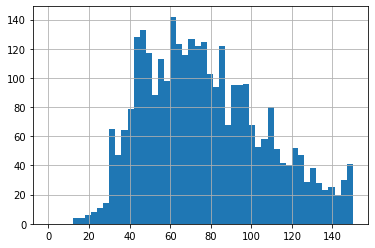

In [73]:
draw_hist_spb('total_area', xmax=150)

Средняя площадь составляет 43-50 и 60-75 кв.м., хотя есть выделения 85 кв.м.

In [74]:
def draw_hist(col, xmin, xmax): #создаем функции для построения гистограм
    df[col].hist(bins=50, range=(xmin, xmax))

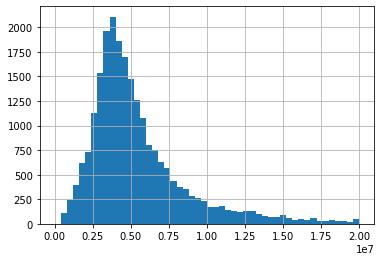

In [75]:
draw_hist('last_price', 0, 20000000) # сравниваем с общей стоисотью

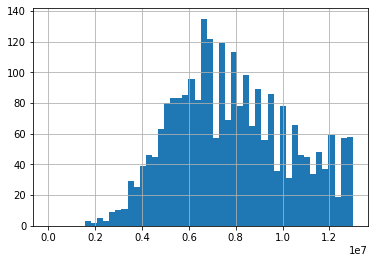

In [76]:
draw_hist_spb('last_price', xmax=13000000)

Стоимость квартир в Санкт-Петербургу логично выше (в 3-4 раза)

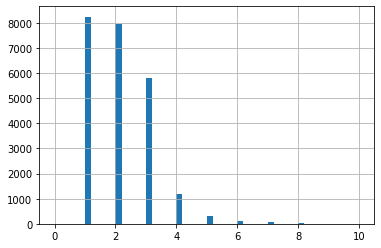

In [77]:
draw_hist('rooms', 0, 10) # сравним с общим кол-ом комнат

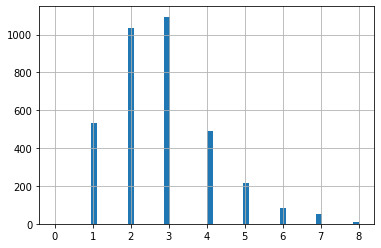

In [78]:
draw_hist_spb('rooms')

Квартир с 1 комнатой горазо меньше, 4х комнатных больше в два раза. Квартир с 2-3 комнатами примерно одинаково и больше всего.

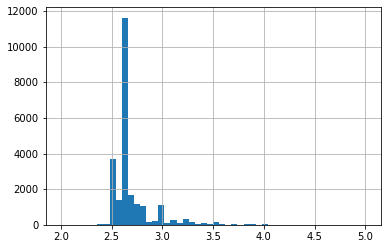

In [79]:
#сравним с общей высотой потолков
draw_hist('ceiling_height', 2, 5)

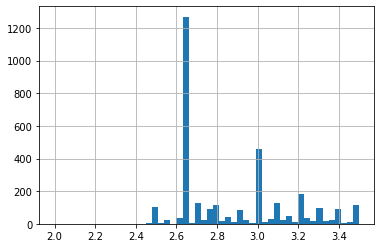

In [80]:
draw_hist_spb('ceiling_height', xmin=2, xmax=3.5)

Большое количество квартир с высотой потолков 2.7 метра. Общая высота потолков по Санкт-Петербургу не сильно, но чуть выше.

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [81]:
apart_spb_center['quad_meter_cost'].corr(apart_spb_center['rooms'])

0.003959010758125196

In [82]:
def draw_plot(df, y, x): #создаем функцию
    df.plot(y=y, x=x, kind='scatter', alpha=0.05)

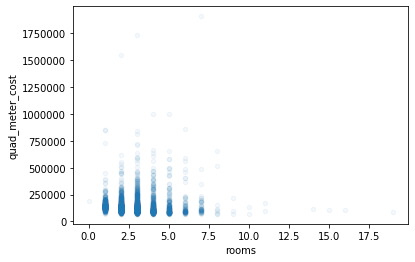

In [83]:
draw_plot(apart_spb_center,'quad_meter_cost','rooms')

В ценре Санкт-Петербурга стоимость квартиры и кол-во комнат связаны прямолинейно, затем, начиная с 3, чем больше комнат - тем меньше стоимость кв.м.

In [84]:
apart_spb_center['quad_meter_cost'].corr(apart_spb_center['city_centers_nearest'])

-0.023159973294175726

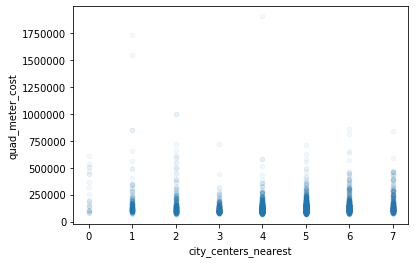

In [85]:
draw_plot(apart_spb_center,'quad_meter_cost','city_centers_nearest')

Взаимосвязь этих двух параметров в центре Санкт-Петербурга совсем маленькая. У нас мало объявлений на нулевом и первом километре Санкт-Петербурга, но по данным, которые есть, можно судить, что в центре города квартиры одинаково дорогие на километрах 0-2 и 5-7. Третий киллометр выбивается из общей картины, 

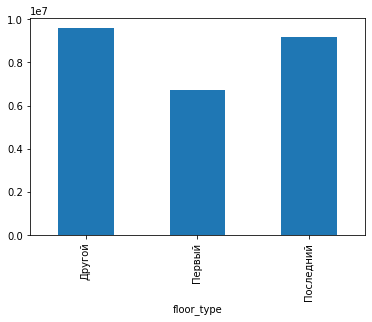

In [86]:
(apart_spb_center
    .groupby('floor_type')['last_price'].median()
    .plot(x='floor_type',y='last_price',kind='bar')
)

В центре стоимость на первый этаж также меньше, чем на других этажах, а вот стоимость на последнем почти такая же, как и на других, в отличие от остальных населенных пунктах.

In [87]:
index1 = apart_spb_center.index
ad_date_spb = apart_spb_center.pivot_table(index=index1, values=['day', 'month', 'year', 'quad_meter_cost'], aggfunc='mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3d1e29410>,
      dtype=object)

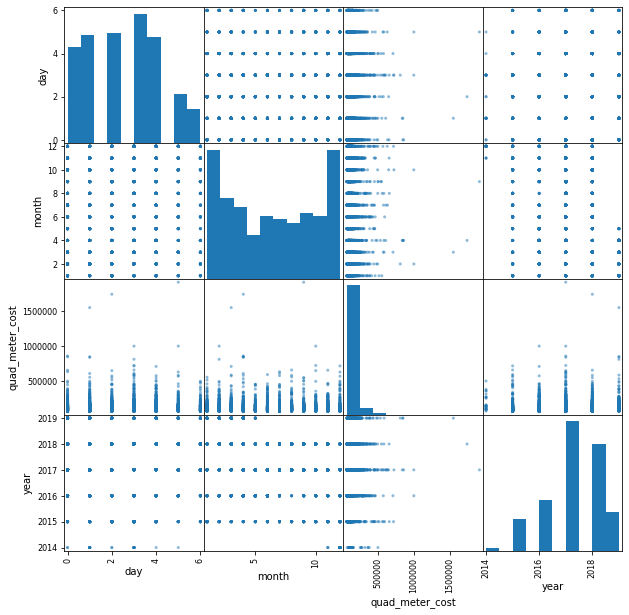

In [88]:
pd.plotting.scatter_matrix(ad_date_spb, figsize=(10, 10))

Выводы:

- Дешевле всего квадратный метр стоит в объявлениях, размещенных на выходных, как и в общих данных
- Квартиры, которые выставляют в декабре и январе дороже всего. Самые дешевые - май, опять же как и ранее. 
- Самые дорогие квартиры продавались в 17 и 18 годах (опять же таки это связано также с самым большим количеством продаж в этих годах)

Скорректируем корреляционный анализ

In [89]:
apart_spb_center[['last_price', 'quad_meter_cost', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,quad_meter_cost,total_area,rooms,city_centers_nearest
last_price,1.0,0.8,0.6,0.3,-0.0
quad_meter_cost,0.8,1.0,0.3,0.0,-0.0
total_area,0.6,0.3,1.0,0.7,-0.1
rooms,0.3,0.0,0.7,1.0,-0.2
city_centers_nearest,-0.0,-0.0,-0.1,-0.2,1.0


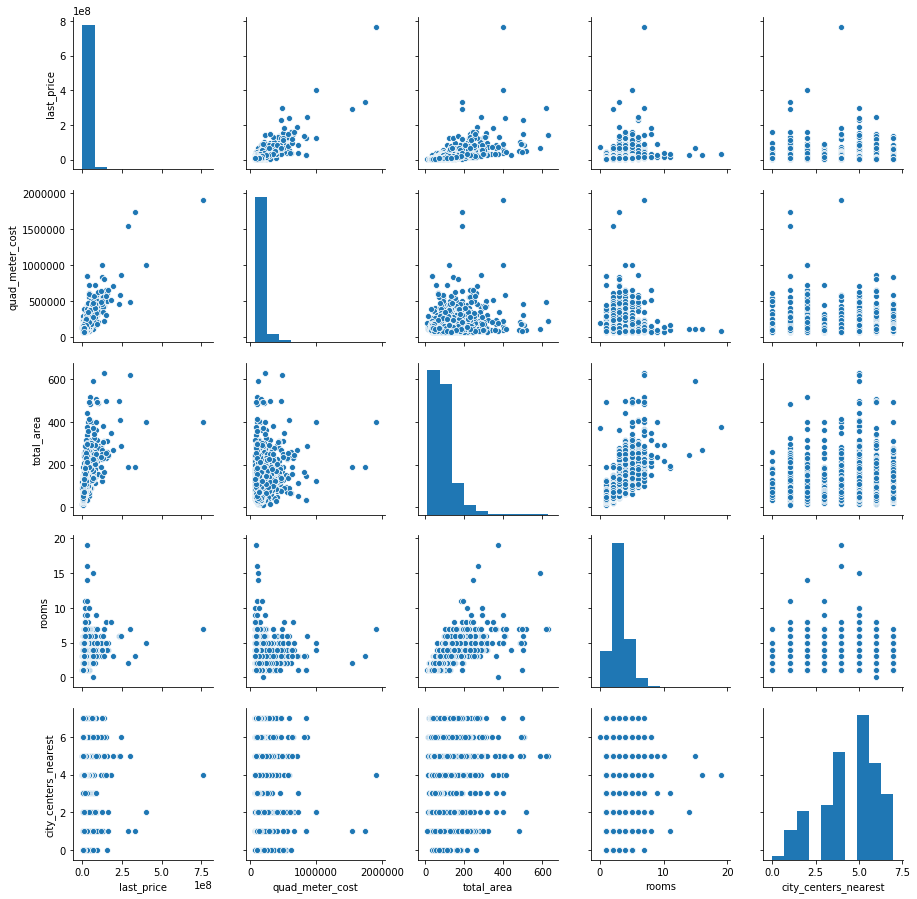

In [90]:
sb.pairplot(apart_spb_center[['last_price', 'quad_meter_cost', 'total_area', 'rooms', 'city_centers_nearest']])

#### **Выводы**
- Из полученных ранее данных квартир с 1 комнатой гораздо меньше, отсюда стоимость на кв.м. на квартиры с 2-3 комнатам будет выше.(есть редкие значние, но ими можно принебречь в виду малого количества)
-  У нас мало объявлений на нулевом и первом километре Санкт-Петербурга, но по данным, которые есть, можно судить, что в центре города квартиры становятся дороже на 2 км (опять же из-за малого количества объявлений на 0 и 1 км)
- больше всего объявлений о продаже приходится на 5-6 км со средней ценой.

## **V. Итоги исследования**

На основании предоставленных исходных данных, сделаны следующие выводы:

**1. По структуре и наполненности данных:**
- часть пользователей не указала информацию по площади, этажам и месторасположению при заполнении данных
- присутствует много пропусков в информации по ближайшим объектам на основании картографических данных
- не выгрузилась часть информации по времени жизни объявления

    *Для решения этих проблем рекомендуется подгружать информацию о месторасположении на основании IP адреса или адреса, указанного при регистрации. Также можно ввести "Бланк заполненности" объявления, чтобы пользователь видел, какую информацию он забыл указать, которая поможет быстрее найти потенциальных покупателей. По поводу не выгрузившиейся информации по времени жизни объявления необходимо связаться с инженерами данных, предоставившими информацию и узнать природу происхождения пропущенных значений в статистических данных с сайта. Вероятнее всего пропуски в этих данных говорят, что объяявление так и не было закрыто, т.е. не жилье не нашло своего покупателя.*

---

**2. По анализу данных:**
- в полученных ранее данных преобладают квартиры с типовой высотой потолков 2,5-2,7м
- рынок сейчас наполнен небольшими квартирами и студиями. Количество четырехкомнатных квартир не велико
- больше всего квартир на рынке с ценой меньше 10 миллионов. Основной пик приходится на отрезок с 3 до 4 миллионов
- чаще всего на рынке квартир встречаются помещения общей площадью от 40 до 70 кв.м

- интерес к покупке нового жилья в течении месяца держится примерно на одном уровне, потом начинает снижиться. 
- на 45 и 60 день происходит всплеск интереса у потенциальных покупателей и в этот период происходит больше всего сделок. Скорее всего это связано с изменением изначальной цены в этот период владельцем жилья, что вызывает всплеск интереса. Еще одним объяснением может быть фиксированный таймер жизни объявления, по истечении которого пользователю необходимо подтвердить продление, в ином случае оно будет автоматически закрыто.
- повышение цены напрямую связано с количеством комнат, однако при определении цены есть сторонние факторы, вносящие свое влияние в формирование цены. Также для квартир с 4 и больше комнатами интерес покупателей, а соответственно и финальная цена начинает падать. то же можно сказать и об общем метраже квартиры: стоимость за кв.м. падает с 75 кв.м.
- цена на квартиру тем выше, чем ближе она находится к центру города
- явной зависимости цены от дня и месяца нет, однако можно предположить, основываясь на данных, что в начале недели объявления о продаже имеют больший ценник на жилье, нежели в конце. По месяцам же обратная ситуация, ближе к концу года - цены на квартиры повышаются. Возможно, это связано с перепродажей построенных новостроек и сданных их покупателям на стадии котлована (одно из предположений)
- с ценами на жилье относительно прошедших лет всё неоднозначно. Прямой зависимости нет, однако виден всплеск роста цен на квартиры в 2014 году, а потом постепенное снижение до стабильного уровня. Это можно связать с внешними факторами: кризисом, депрессией или другими внешне политическими событиями. Однако помимо этого в 2014 году замечен и самый низкий уровень продаж квартир, который может быть связан всё с теми же событиями. Самый же пик продаж приходится на 2017-2018 года.
- жилые помещения на первом этаже обладают наименьшими ценами, что связано с личными предпочтениями людей, наибольшими же ценами обладают те, что размещены на других этажах. В центре Санкт-Петербурга стоимость квадратного метра на последнем этаже почти такая же, как и на других
- больше всего предложений о продаже жилья в Санкт-Петербурге
- cредняя цена также выше в Санкт-Петербурге, однако в средних ценах также выбиваются Пушкин, Парголово и Кудрово. Возможно, это связано с новым строительством жилых домов и кварталов, а также повышенным статусом района.
- самая высокая цена за квадратный метр в Санкт-Петербурге, а самая низкая в Выборге.
- квартиры в центре почти одинаково размера с общими данными, но есть пики и на квартиры размером 60-75 и 85 кв.м. т.е можно считать, что квартиры в центре большего размера
- стоимость квартиры в центре больше в 3-4 раза
- количество комнат в квартирах в центре Санкт-Петербурга больше - в основном, 2-4 комнаты (против 1-3), потолки выше;

**Для центра будет характерно:** 
- стоимость на квартиры с 2-3 комнатами будет выше
- на 2км квартиры становятся дороже, но это только потому, что на 0 и 1 км гораздо меньше объявлений
- с 4 по 7 км наблюдается всплеск стоимости и количества размещаемых объявлений (это характерно как для СПб, так и для других населенных пунктов)
---

**3. Помимо этого в ходе исследования было выполнено:**
- заполнены пропущенные значения в данных
- установлены параметры (площадь, цена, число комнат, высота потолков)
- установлена связь между разными параметрами и построены графики для наглядности
- добавлена информация о цене квадратного метра;
- добавлена информация о дне недели, месяце и годе публикации объявления;
- добавлена информация об этаже квартиры;
- добавлена информация о соотношении жилой и кухонной площади к общей площади.